# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import cv2
import os
import requests
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

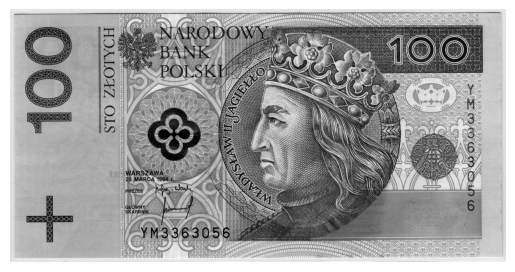

In [5]:
image = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.axis("off")
plt.show() 

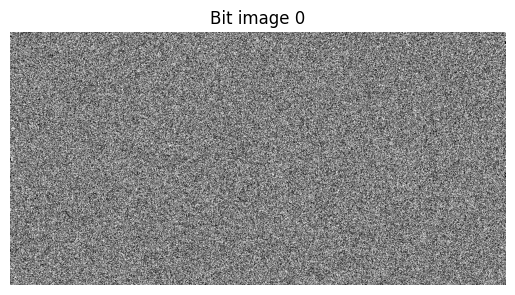

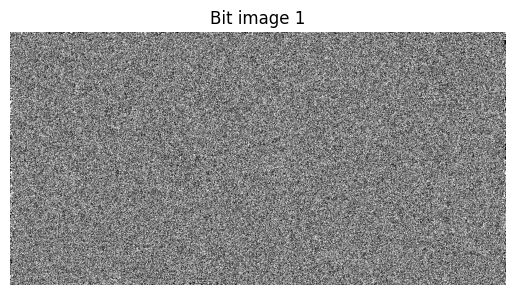

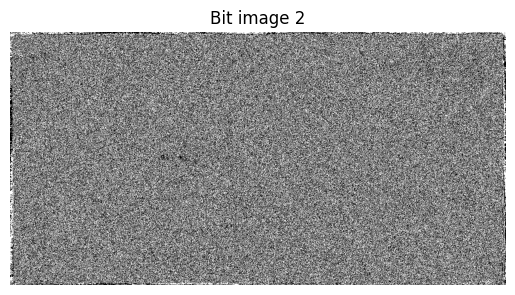

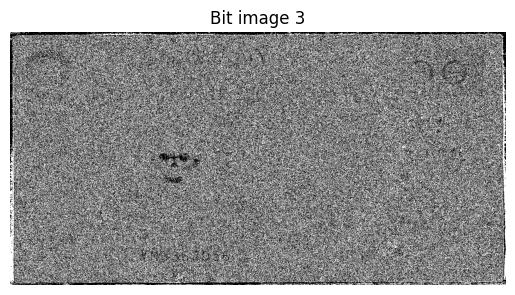

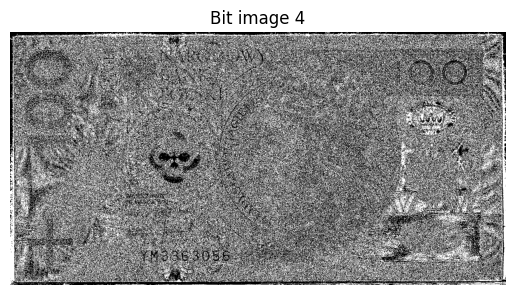

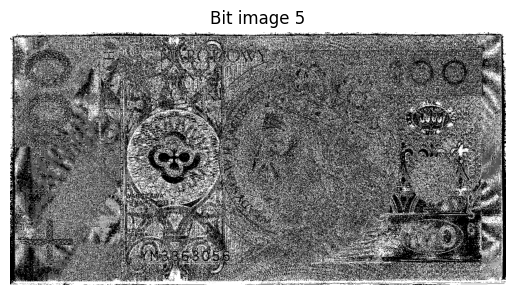

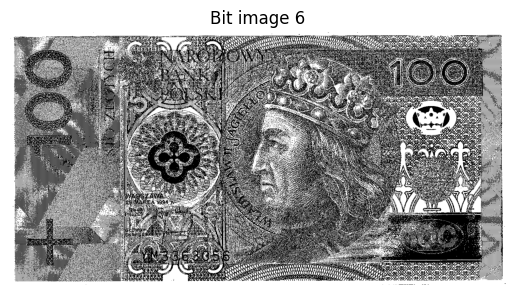

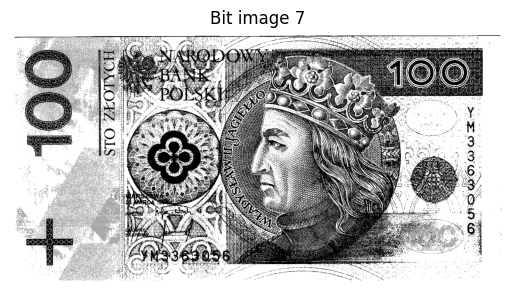

In [6]:
for i in range(8):
    bit_img = (image >> i) & 1
    bit_img = bit_img * 255
    plt.imshow(bit_img, cmap='gray')
    plt.title(f'Bit image {i}')
    plt.axis('off')
    plt.show()

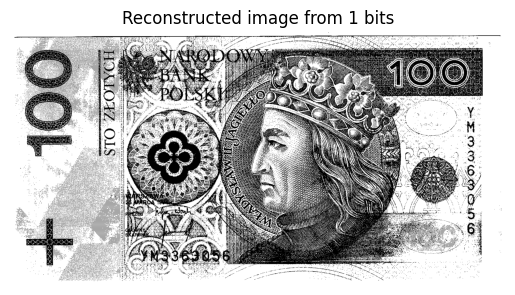

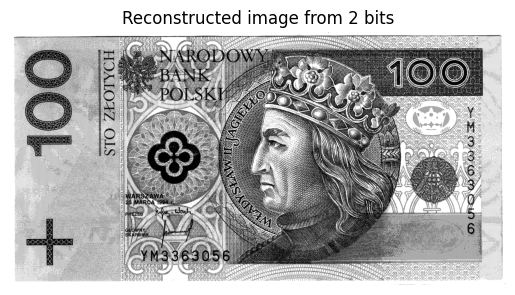

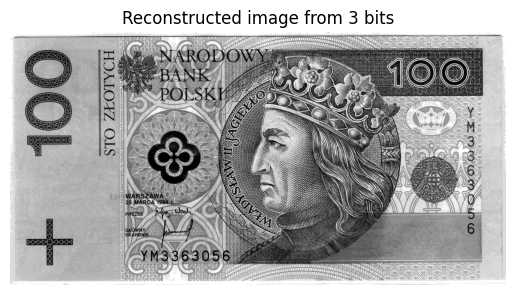

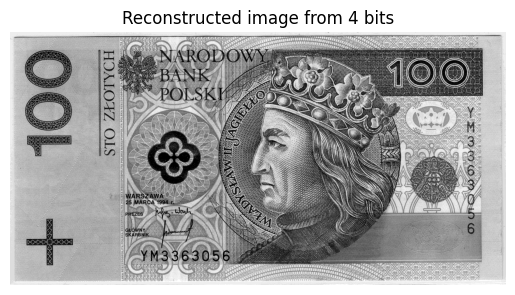

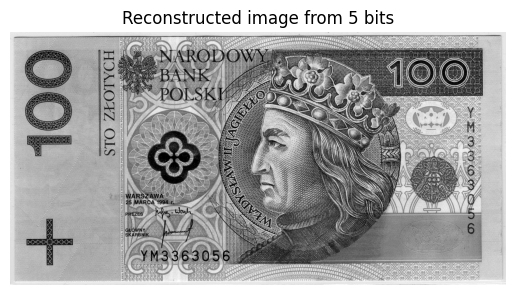

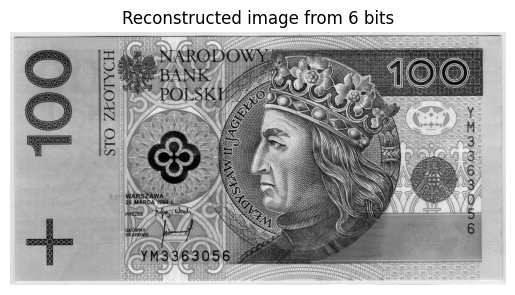

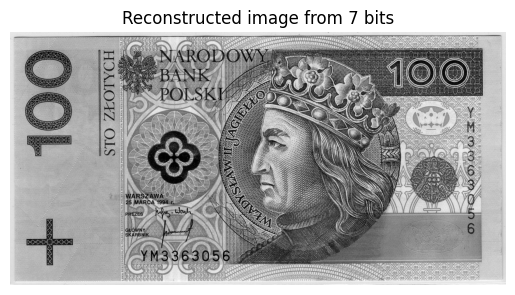

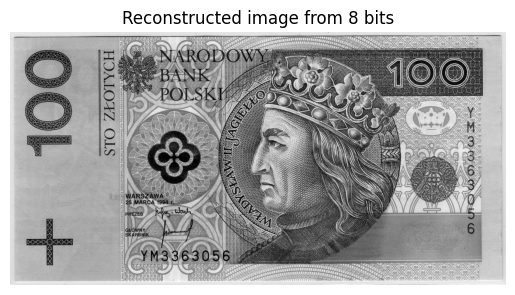

In [7]:
import numpy as np

new_img = np.zeros(image.shape, dtype=np.uint8)
all_imgs = []

for i in range(8):
    bit_img = (image >> (7 - i)) & 1
    new_img += (bit_img) * (2 ** (7 - i))
    new_img_copy = new_img.copy()
    all_imgs.append(new_img_copy)


for i in range (8):
    plt.imshow(all_imgs[i], cmap='gray')
    plt.title(f'Reconstructed image from {i + 1} bits')
    plt.axis('off')
    plt.show()
